In [1]:
import pandas as pd
import numpy as np

In [2]:
event_def = pd.read_csv('Event_Definitions.csv')

In [3]:
event_def 

,event_name,journey_id,event_definition_id,milestone_number,stage
0,application_phone_approved,1,15,1.0,Apply for Credit
1,application_phone_declined,1,16,NaN,Apply for Credit
2,application_phone_pending,1,17,NaN,Apply for Credit
3,application_web_approved,1,12,1.0,Apply for Credit
4,application_web_declined,1,13,NaN,Apply for Credit
5,application_web_pending,1,14,NaN,Apply for Credit
6,application_web_submit,1,3,NaN,Apply for Credit
7,application_web_view,1,19,NaN,Apply for Credit
8,account_activitation,1,29,3.0,Credit Account
9,account_fraud_review,1,37,NaN,Credit Account


In [4]:
smaller_sample = pd.read_csv('smaller_sample.csv')

In [5]:
len(smaller_sample)

3246341

In [6]:
smaller_sample = smaller_sample.sort_values(by=['customer_id', 'event_timestamp'])

In [7]:
unique_stages = smaller_sample['ed_id'].unique()

In [8]:
smaller_sample['next_ed'] = smaller_sample.groupby('customer_id')['ed_id'].shift(-1)

In [9]:
smaller_sample.head()

,customer_id,account_id,stage,ed_id,event_name,event_timestamp,journey_steps_until_end,journey_id,milestone_number,next_ed
3025070,-2.147454e+09,-1083699890,Apply for Credit,12,application_web_approved,2021-06-15 04:44:49,1,1.0,1.0,4.0
3025071,-2.147454e+09,-1083699890,First Purchase,4,browse_products,2021-06-15 04:48:53,2,1.0,NaN,24.0
3025072,-2.147454e+09,-1083699890,NaN,24,campaignemail_clicked,2021-06-17 09:10:24,3,NaN,NaN,1.0
3025073,-2.147454e+09,-1083699890,NaN,1,promotion_created,2021-07-08 07:03:12.12,4,NaN,NaN,1.0
3025074,-2.147454e+09,-1083699890,NaN,1,promotion_created,2021-07-11 21:12:53.993,5,NaN,NaN,21.0


In [10]:
smaller_sample = smaller_sample.dropna(subset=['next_ed'])

In [11]:
ed_id_transition_counts = smaller_sample.groupby(['ed_id', 'next_ed']).size().unstack(fill_value=0)

In [12]:
ed_id_transition_matrix = ed_id_transition_counts.div(ed_id_transition_counts.sum(axis=1), axis=0)

In [13]:
print(ed_id_transition_matrix)

next_ed      1.0       2.0       3.0       4.0       5.0       6.0       7.0   \
ed_id                                                                           
1        0.479956  0.010161  0.001581  0.111800  0.048445  0.010594  0.000324   
2        0.056165  0.011305  0.009375  0.131864  0.031179  0.015123  0.000255   
3        0.011698  0.010495  0.167707  0.024240  0.008863  0.004997  0.000458   
4        0.034423  0.004189  0.001015  0.704515  0.052794  0.003851  0.000297   
5        0.042986  0.002639  0.001416  0.297174  0.292472  0.295937  0.001218   
6        0.107344  0.005452  0.003297  0.087880  0.453096  0.140883  0.060395   
7        0.017303  0.011132  0.002826  0.122505  0.070539  0.026531  0.005018   
8        0.016255  0.008675  0.001278  0.122871  0.054883  0.017214  0.331446   
10       0.000000  0.000000  0.000000  0.000000  0.071429  0.071429  0.000000   
11       0.034823  0.002021  0.001806  0.421463  0.408864  0.022525  0.001303   
12       0.189088  0.058089 

In [14]:
smaller_sample['next_event'] = smaller_sample.groupby('customer_id')['event_name'].shift(-1)

In [15]:
smaller_sample.head()

,customer_id,account_id,stage,ed_id,event_name,event_timestamp,journey_steps_until_end,journey_id,milestone_number,next_ed,next_event
3025070,-2.147454e+09,-1083699890,Apply for Credit,12,application_web_approved,2021-06-15 04:44:49,1,1.0,1.0,4.0,browse_products
3025071,-2.147454e+09,-1083699890,First Purchase,4,browse_products,2021-06-15 04:48:53,2,1.0,NaN,24.0,campaignemail_clicked
3025072,-2.147454e+09,-1083699890,NaN,24,campaignemail_clicked,2021-06-17 09:10:24,3,NaN,NaN,1.0,promotion_created
3025073,-2.147454e+09,-1083699890,NaN,1,promotion_created,2021-07-08 07:03:12.12,4,NaN,NaN,1.0,promotion_created
3025074,-2.147454e+09,-1083699890,NaN,1,promotion_created,2021-07-11 21:12:53.993,5,NaN,NaN,21.0,catalog_(mail)


In [16]:
smaller_sample = smaller_sample.dropna(subset=['next_event'])

In [17]:
smaller_sample.head()

,customer_id,account_id,stage,ed_id,event_name,event_timestamp,journey_steps_until_end,journey_id,milestone_number,next_ed,next_event
3025070,-2.147454e+09,-1083699890,Apply for Credit,12,application_web_approved,2021-06-15 04:44:49,1,1.0,1.0,4.0,browse_products
3025071,-2.147454e+09,-1083699890,First Purchase,4,browse_products,2021-06-15 04:48:53,2,1.0,NaN,24.0,campaignemail_clicked
3025072,-2.147454e+09,-1083699890,NaN,24,campaignemail_clicked,2021-06-17 09:10:24,3,NaN,NaN,1.0,promotion_created
3025073,-2.147454e+09,-1083699890,NaN,1,promotion_created,2021-07-08 07:03:12.12,4,NaN,NaN,1.0,promotion_created
3025074,-2.147454e+09,-1083699890,NaN,1,promotion_created,2021-07-11 21:12:53.993,5,NaN,NaN,21.0,catalog_(mail)


In [18]:
event_transition_counts = smaller_sample.groupby(['event_name', 'next_event']).size().unstack(fill_value=0)

In [19]:
event_transition_matrix = event_transition_counts.div(event_transition_counts.sum(axis=1), axis=0)

In [20]:
print(event_transition_matrix)

next_event                              account_activitation  \
event_name                                                     
account_activitation                                0.000491   
account_downpaymentcleared                          0.000327   
account_downpaymentreceived                         0.000000   
add_to_cart                                         0.001356   
application_phone_approved                          0.059448   
application_phone_declined                          0.090909   
application_web_approved                            0.006660   
application_web_declined                            0.007360   
application_web_pending                             0.000000   
application_web_submit                              0.000960   
application_web_view                                0.000562   
begin_checkout                                      0.011666   
browse_products                                     0.003234   
campaign_click                          

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

In [22]:
G = nx.DiGraph()
labels={}
edge_labels={}

In [23]:
states = smaller_sample[['ed_id', 'next_ed']]

In [24]:
ed_id_transition_matrix[1][1]

0.4799564637052007

In [25]:
for i, origin_state in enumerate(states):
    for j, destination_state in enumerate(states):
        rate = ed_id_transition_matrix[i+1][j+1]
        if rate > 0:
            G.add_edge(origin_state,
                       destination_state,
                       weight=rate,
                       label="{:.02f}".format(rate))
            edge_labels[(origin_state, destination_state)] = label="{:.02f}".format(rate)

In [26]:
all_unique_events = smaller_sample['event_name'].unique()

doowap_sorted = smaller_sample.sort_values(by=['customer_id', 'event_name'])  
initial_events = doowap_sorted.drop_duplicates(subset='customer_id', keep='first')

initial_event_counts = initial_events['event_name'].value_counts()

initial_state_dist = pd.Series(0, index=all_unique_events)

initial_state_dist.update(initial_event_counts)

total_customers = initial_events['customer_id'].nunique()
initial_state_dist = initial_state_dist / total_customers

print(initial_state_dist)

application_web_approved                  0.338744
browse_products                           0.000253
campaignemail_clicked                     0.000051
promotion_created                         0.000646
catalog_(mail)                            0.001887
begin_checkout                            0.000013
add_to_cart                               0.371084
view_cart                                 0.000025
application_web_view                      0.003419
application_web_submit                    0.014726
campaign_click                            0.005597
account_activitation                      0.252906
place_order_web                           0.000000
place_downpayment                         0.000000
account_downpaymentcleared                0.000000
application_phone_approved                0.009117
place_order_phone                         0.000013
pre-application_(3rd_party_affiliates)    0.000836
application_web_declined                  0.000582
site_registration              

In [27]:
def simulate_markov_chain(transition_matrix, initial_state_dist, steps):
    state = np.random.choice(np.arange(25), p=initial_state_dist)  
    states_visited = [state]
    
    for i in range(steps - 1):
        state = np.random.choice(np.arange(25), p=transition_matrix[state])
        states_visited.append(state)

In [28]:
import matplotlib.pyplot as plt

In [29]:
import pydtmc

In [30]:
ed_id_transition_matrix

next_ed,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0,11.0,...,18.0,19.0,21.0,22.0,23.0,24.0,26.0,27.0,28.0,29.0
ed_id,,,,,,,,,,,,,,,,,,,,,
1,0.479956,0.010161,0.001581,0.111800,0.048445,0.010594,0.000324,0.000477,0.000000,0.008199,...,0.000976,0.013055,0.264648,0.000596,0.000303,0.032450,0.000084,0.001731,0.001513,0.008433
2,0.056165,0.011305,0.009375,0.131864,0.031179,0.015123,0.000255,0.000806,0.000021,0.003691,...,0.001230,0.161113,0.002036,0.080747,0.000424,0.028040,0.000233,0.005621,0.000127,0.009375
3,0.011698,0.010495,0.167707,0.024240,0.008863,0.004997,0.000458,0.000472,0.000000,0.005627,...,0.000043,0.578391,0.000401,0.000200,0.000272,0.003093,0.000029,0.000444,0.000157,0.001017
4,0.034423,0.004189,0.001015,0.704515,0.052794,0.003851,0.000297,0.000818,0.000000,0.162179,...,0.000349,0.008110,0.003472,0.000207,0.000182,0.015338,0.000059,0.002405,0.001947,0.003223
5,0.042986,0.002639,0.001416,0.297174,0.292472,0.295937,0.001218,0.001568,0.000000,0.025729,...,0.001012,0.007977,0.003137,0.000090,0.000715,0.013536,0.000144,0.003549,0.002605,0.005423
6,0.107344,0.005452,0.003297,0.087880,0.453096,0.140883,0.060395,0.050673,0.000007,0.017260,...,0.000798,0.032308,0.004864,0.000224,0.000357,0.019947,0.000105,0.001841,0.000364,0.012017
7,0.017303,0.011132,0.002826,0.122505,0.070539,0.026531,0.005018,0.476929,0.000000,0.014650,...,0.000692,0.010670,0.000923,0.000923,0.001038,0.031492,0.002884,0.098743,0.003057,0.097301
8,0.016255,0.008675,0.001278,0.122871,0.054883,0.017214,0.331446,0.151728,0.000000,0.010365,...,0.000776,0.005936,0.001278,0.000320,0.000822,0.030501,0.003105,0.134103,0.015022,0.093238
10,0.000000,0.000000,0.000000,0.000000,0.071429,0.071429,0.000000,0.000000,0.857143,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [31]:
import pandas as pd

smaller_sample.sort_values(by=['customer_id', 'event_timestamp'], inplace=True)


In [32]:
unique_events = smaller_sample['event_name'].unique()
n_events = len(unique_events)


In [33]:
event_name_to_index = {event_name: index for index, event_name in enumerate(unique_events)}

In [34]:
import numpy as np

transition_counts = np.zeros((n_events, n_events))

In [35]:
for _, group in smaller_sample.groupby('customer_id'):
    events = group['event_name'].apply(lambda x: event_name_to_index[x]).values
    for i in range(len(events) - 1):
        current_event, next_event = events[i], events[i + 1]
        transition_counts[current_event, next_event] += 1


In [36]:
transition_probs = transition_counts / transition_counts.sum(axis=1, keepdims=True)

In [37]:
transition_probs[np.isnan(transition_probs)] = 0
np.fill_diagonal(transition_probs, 0)  

In [38]:
transition_df = pd.DataFrame(transition_probs, index=unique_events, columns=unique_events)

In [39]:
transition_df

,application_web_approved,browse_products,campaignemail_clicked,promotion_created,catalog_(mail),begin_checkout,add_to_cart,view_cart,application_web_view,application_web_submit,...,place_order_phone,pre-application_(3rd_party_affiliates),application_web_declined,site_registration,order_shipped,account_downpaymentreceived,catalog_(email)_(experian),fingerhut_university,application_phone_declined,application_web_pending
application_web_approved,0.000000,0.500249,0.029497,0.192743,0.005373,0.022486,0.003486,0.023351,0.151178,0.019380,...,0.001992,0.003853,0.000026,0.001376,0.000000,0.000013,0.0,0.000000,0.000000,0.000000
browse_products,0.000492,0.000000,0.014606,0.033533,0.003314,0.003672,0.165122,0.052761,0.008025,0.000946,...,0.000326,0.000167,0.000064,0.000148,0.000047,0.000059,0.0,0.000000,0.000000,0.000000
campaignemail_clicked,0.001418,0.193039,0.000000,0.216079,0.044437,0.011176,0.005223,0.061033,0.011766,0.001292,...,0.001685,0.000154,0.000393,0.000126,0.000211,0.000744,0.0,0.000000,0.000000,0.000014
promotion_created,0.004267,0.126382,0.034463,0.000000,0.254446,0.011677,0.009496,0.054658,0.014744,0.001843,...,0.000818,0.000600,0.000458,0.000273,0.000065,0.000094,0.0,0.000000,0.000004,0.000000
catalog_(mail),0.014816,0.107101,0.044884,0.647286,0.000000,0.003798,0.000266,0.028169,0.015215,0.000387,...,0.001246,0.000931,0.000060,0.000254,0.000109,0.000048,0.0,0.000000,0.000000,0.000000
begin_checkout,0.000717,0.088022,0.019146,0.104686,0.004770,0.000000,0.016504,0.459272,0.033233,0.003308,...,0.000775,0.000203,0.000029,0.000297,0.000022,0.000101,0.0,0.000007,0.000000,0.000000
add_to_cart,0.000164,0.424807,0.002995,0.034597,0.000392,0.021661,0.000000,0.410202,0.004184,0.001728,...,0.000073,0.000050,0.000018,0.000105,0.000000,0.000009,0.0,0.000000,0.000000,0.000000
view_cart,0.000519,0.302083,0.012706,0.041902,0.003058,0.298823,0.025461,0.000000,0.008010,0.001374,...,0.000913,0.000085,0.000064,0.000581,0.000067,0.000140,0.0,0.000000,0.000000,0.000000
application_web_view,0.029356,0.025339,0.002082,0.007321,0.000629,0.002233,0.001067,0.005590,0.000000,0.103886,...,0.000123,0.000151,0.000832,0.000167,0.000004,0.000032,0.0,0.000000,0.000000,0.000000
application_web_submit,0.171955,0.023098,0.002479,0.011305,0.000369,0.004679,0.005343,0.008575,0.592095,0.000000,...,0.000015,0.000133,0.004206,0.000207,0.000000,0.000030,0.0,0.000000,0.000000,0.000015


In [40]:
column_sums = transition_df.sum(axis=0)
zero_columns = column_sums == 0

# For columns that sum to 0, assign uniform probabilities
for col in transition_df.columns[zero_columns]:
    transition_df[col] = 1 / len(transition_df.columns)

transition_df = transition_df.div(transition_df.sum(axis=0), axis=1)

In [41]:
column_sums = transition_df.sum(axis=0)
print(column_sums)

application_web_approved                  1.0
browse_products                           1.0
campaignemail_clicked                     1.0
promotion_created                         1.0
catalog_(mail)                            1.0
begin_checkout                            1.0
add_to_cart                               1.0
view_cart                                 1.0
application_web_view                      1.0
application_web_submit                    1.0
campaign_click                            1.0
account_activitation                      1.0
place_order_web                           1.0
place_downpayment                         1.0
account_downpaymentcleared                1.0
application_phone_approved                1.0
place_order_phone                         1.0
pre-application_(3rd_party_affiliates)    1.0
application_web_declined                  1.0
site_registration                         1.0
order_shipped                             1.0
account_downpaymentreceived       

In [42]:
names = transition_df.index.tolist()
print(names)

['application_web_approved', 'browse_products', 'campaignemail_clicked', 'promotion_created', 'catalog_(mail)', 'begin_checkout', 'add_to_cart', 'view_cart', 'application_web_view', 'application_web_submit', 'campaign_click', 'account_activitation', 'place_order_web', 'place_downpayment', 'account_downpaymentcleared', 'application_phone_approved', 'place_order_phone', 'pre-application_(3rd_party_affiliates)', 'application_web_declined', 'site_registration', 'order_shipped', 'account_downpaymentreceived', 'catalog_(email)_(experian)', 'fingerhut_university', 'application_phone_declined', 'application_web_pending']


In [43]:
mc = pydtmc.MarkovChain(np.transpose(transition_df), names)

In [44]:
print(mc)


DISCRETE-TIME MARKOV CHAIN
 SIZE:           26
 RANK:           26
 CLASSES:        1
  > RECURRENT:   1
  > TRANSIENT:   0
 ERGODIC:        YES
  > APERIODIC:   YES
  > IRREDUCIBLE: YES
 ABSORBING:      NO
 REGULAR:        YES
 REVERSIBLE:     NO
 SYMMETRIC:      NO



In [45]:
print(mc.recurrent_states)

['application_web_approved', 'browse_products', 'campaignemail_clicked', 'promotion_created', 'catalog_(mail)', 'begin_checkout', 'add_to_cart', 'view_cart', 'application_web_view', 'application_web_submit', 'campaign_click', 'account_activitation', 'place_order_web', 'place_downpayment', 'account_downpaymentcleared', 'application_phone_approved', 'place_order_phone', 'pre-application_(3rd_party_affiliates)', 'application_web_declined', 'site_registration', 'order_shipped', 'account_downpaymentreceived', 'catalog_(email)_(experian)', 'fingerhut_university', 'application_phone_declined', 'application_web_pending']


In [46]:
print(mc.transient_states)

[]


In [47]:
print(mc.steady_states)

[array([0.02099627, 0.01045488, 0.02919724, 0.08786314, 0.02327077,
       0.03605197, 0.01026083, 0.02537985, 0.01864149, 0.02973999,
       0.03906466, 0.04056985, 0.09979964, 0.10611727, 0.04223373,
       0.05985519, 0.0487047 , 0.02329801, 0.02712732, 0.02734335,
       0.0211967 , 0.03991687, 0.03267781, 0.00619071, 0.06672263,
       0.02732513])]


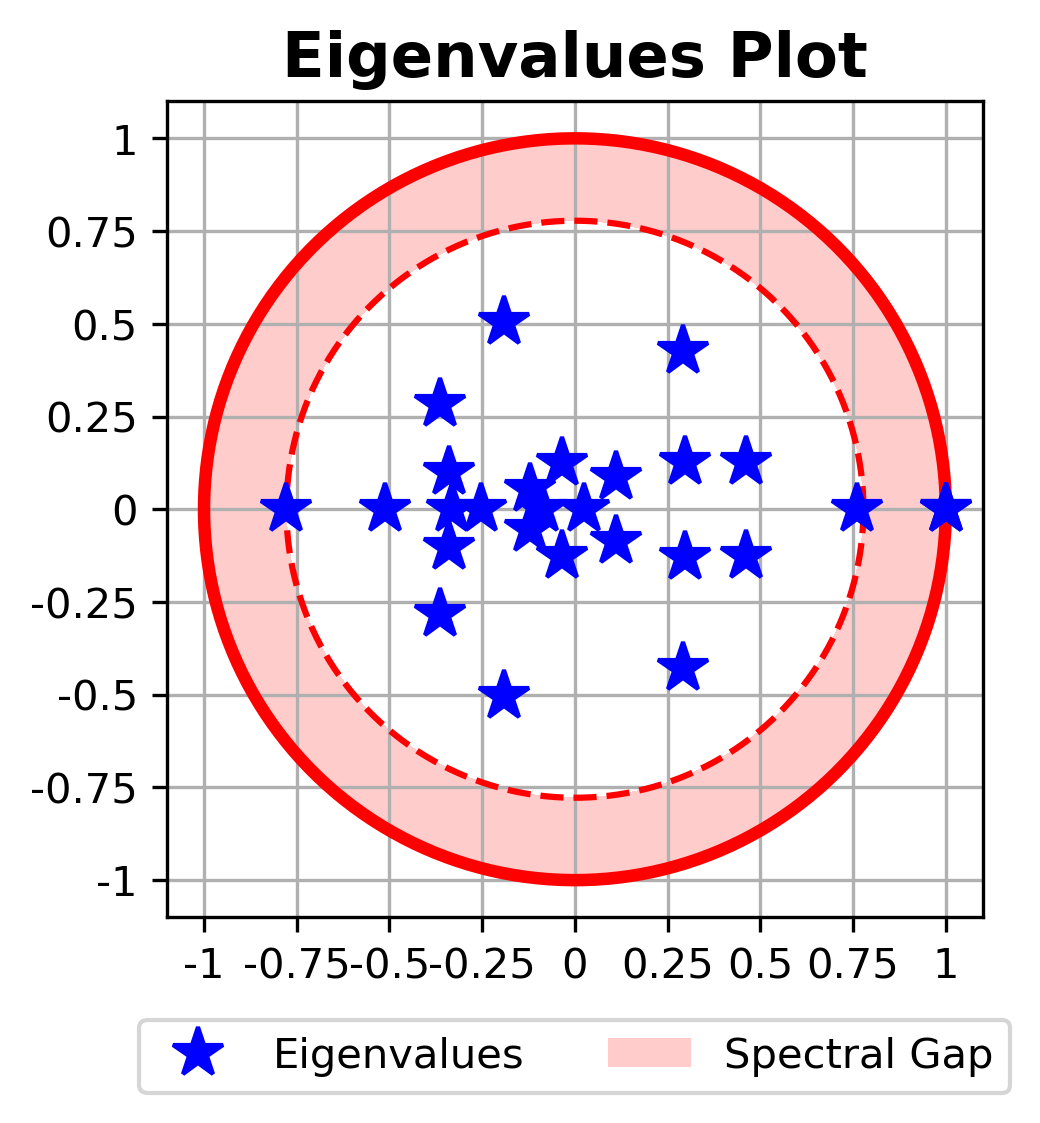

In [48]:
pydtmc.plot_eigenvalues(mc, dpi=300)

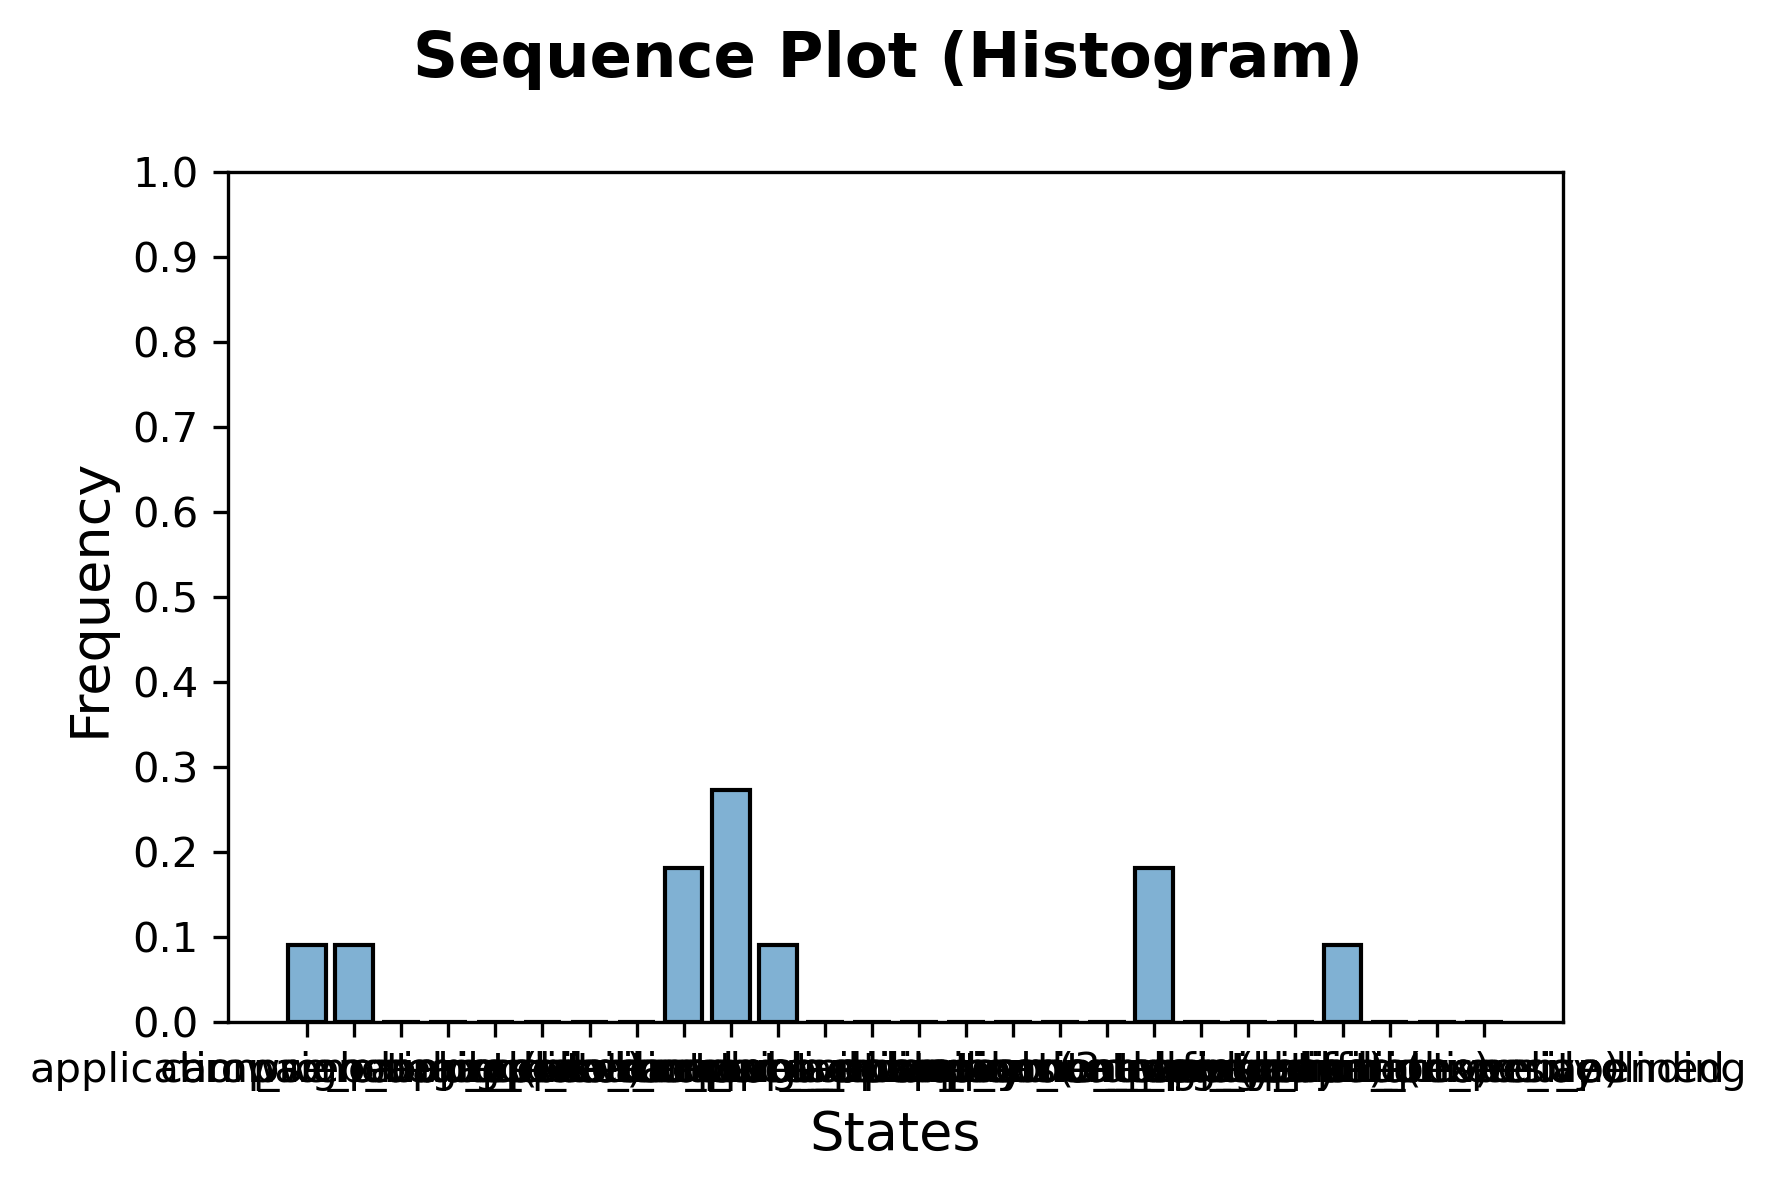

In [49]:
pydtmc.plot_sequence(mc, 10, plot_type='histogram', dpi=300)

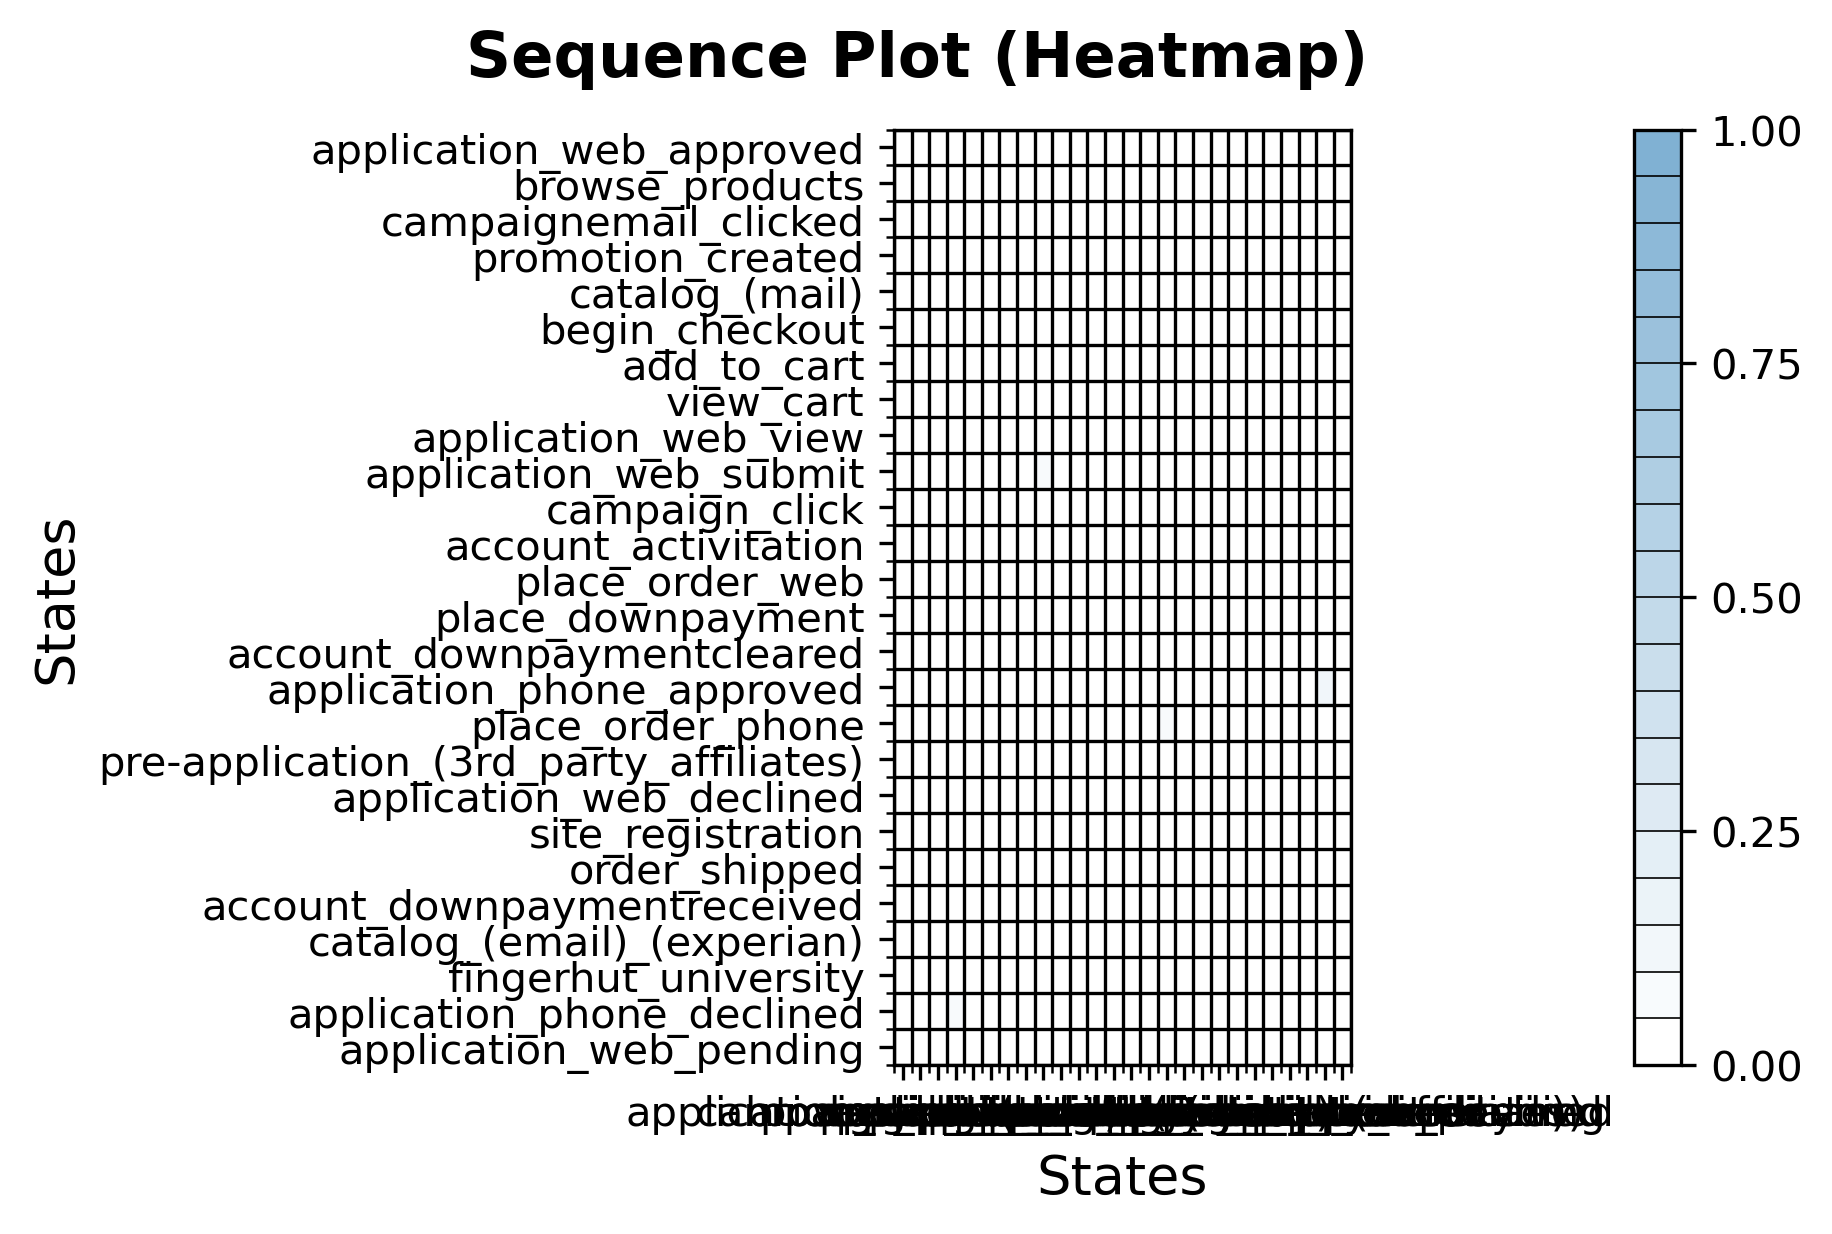

In [50]:
pydtmc.plot_sequence(mc, 26, plot_type='heatmap', dpi=300)

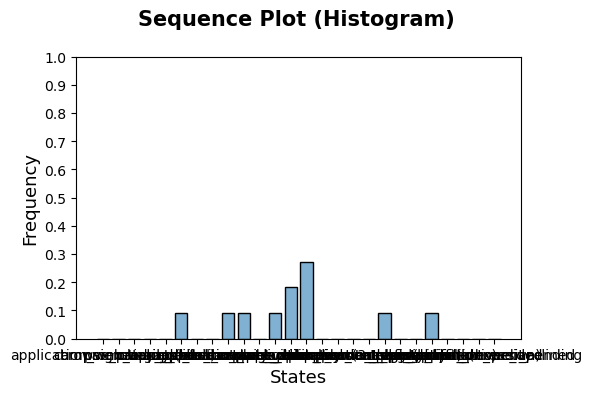

In [51]:
pydtmc.plot_sequence(mc, 10, initial_state=None, plot_type='histogram', seed=None, dpi=100)

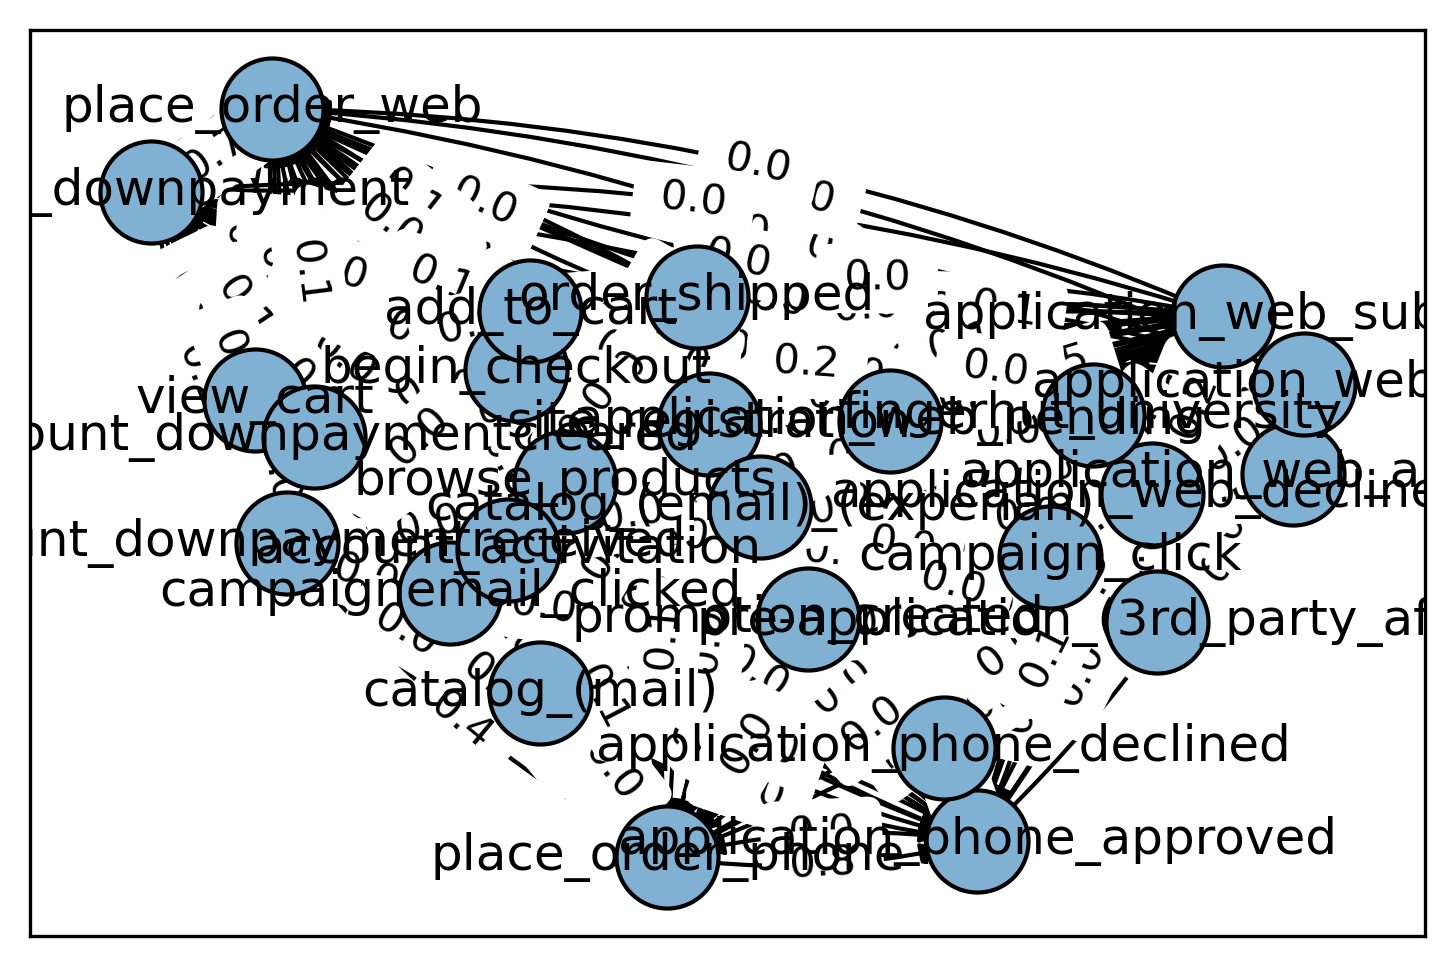

In [52]:
pydtmc.plot_graph(mc, nodes_color=True, nodes_shape=True, edges_label=True, force_standard=False, dpi=300)

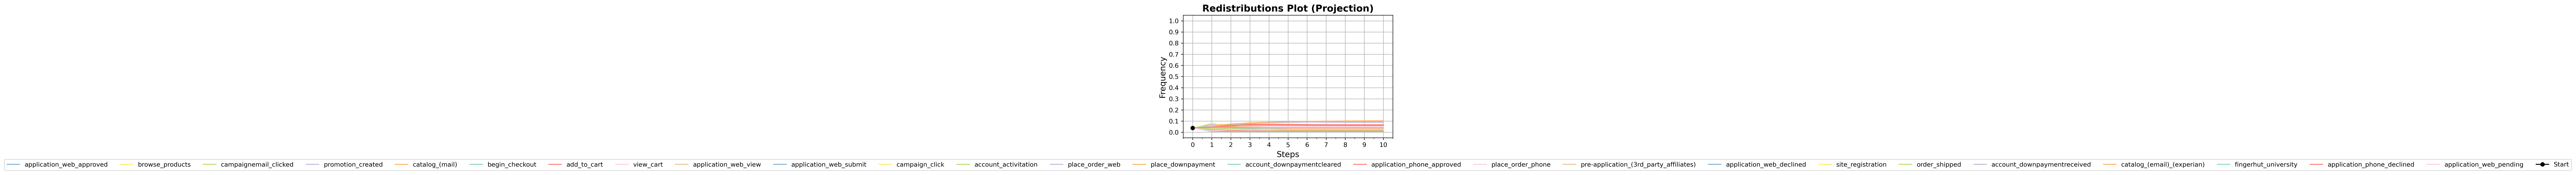

In [53]:
pydtmc.plot_redistributions(mc, 10, plot_type='projection', dpi=300)

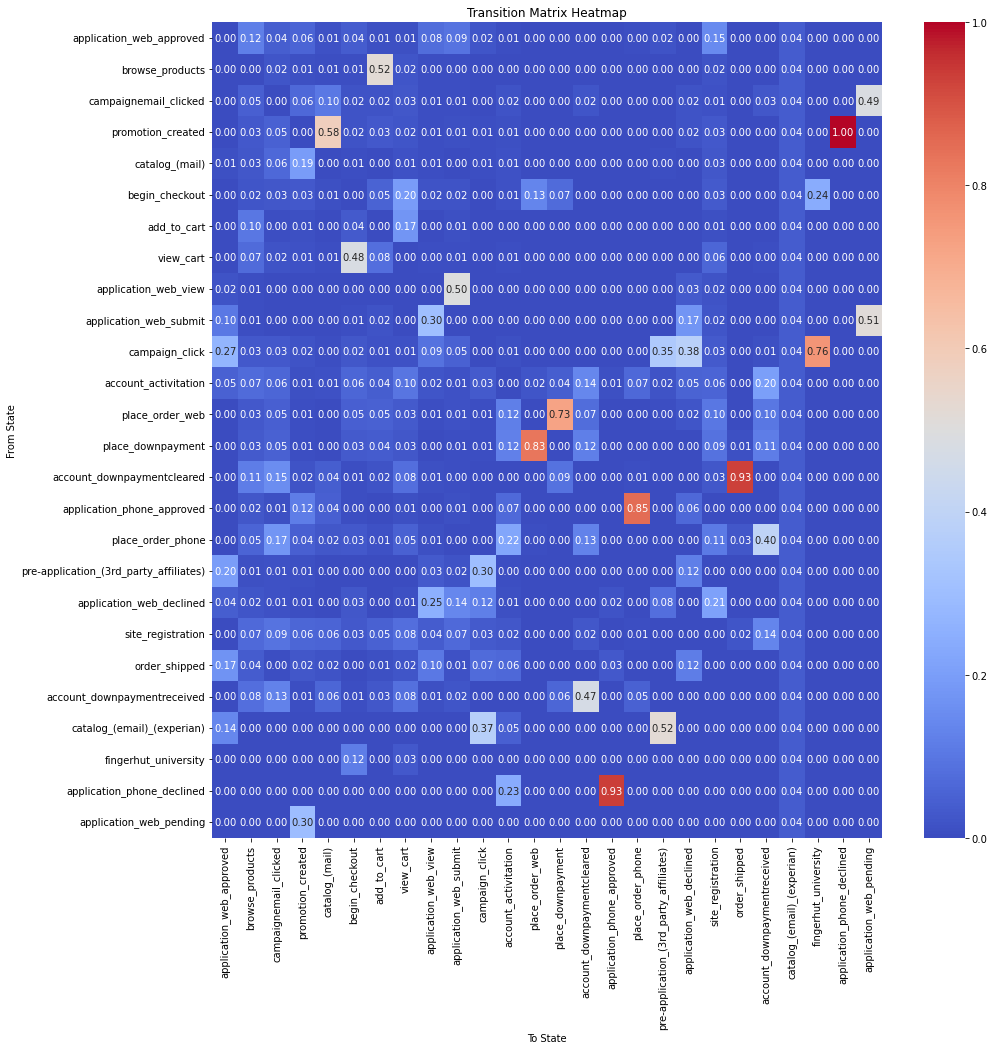

In [54]:
import seaborn as sns
plt.figure(figsize=(15, 15))
sns.heatmap(transition_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Transition Matrix Heatmap')
plt.xlabel('To State')
plt.ylabel('From State')
plt.show()

In [55]:
import mchmm as mc

In [56]:
event_transition_counts

next_event,account_activitation,account_downpaymentcleared,account_downpaymentreceived,add_to_cart,application_phone_approved,application_phone_declined,application_web_approved,application_web_declined,application_web_pending,application_web_submit,...,catalog_(mail),fingerhut_university,order_shipped,place_downpayment,place_order_phone,place_order_web,pre-application_(3rd_party_affiliates),promotion_created,site_registration,view_cart
event_name,,,,,,,,,,,,,,,,,,,,,
account_activitation,10,3903,102,229,165,0,1426,22,0,54,...,109,0,1,499,515,159,72,628,10,3930
account_downpaymentcleared,2,0,0,23,0,0,5,0,0,4,...,217,0,258,411,42,2,0,449,4,1055
account_downpaymentreceived,0,281,0,2,0,0,0,0,0,1,...,6,0,0,11,5,0,0,7,0,47
add_to_cart,300,156,2,20890,2,0,36,4,0,391,...,87,0,0,252,16,287,13,7692,23,90705
application_phone_approved,84,1,0,2,1,0,0,2,0,3,...,25,0,0,0,546,0,0,549,0,31
application_phone_declined,1,0,0,0,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
application_web_approved,523,39,1,268,0,0,17,4,0,1479,...,436,0,0,42,162,49,465,15048,117,1810
application_web_declined,15,1,0,2,29,0,137,9,0,59,...,0,0,0,0,1,0,36,50,4,48
application_web_pending,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0


In [57]:
#smaller_sample3 = smaller_sample.sort_values(by=['customer_id', 'event_timestamp'])

In [58]:
#sequences = []

In [59]:
#for _, group in smaller_sample3.groupby('customer_id'):
    #sequences.append(group['event_name'].tolist())

IndentationError: unexpected indent (3496660034.py, line 2)

In [ ]:
#sequences

In [60]:
def _get_markov_edges(Q):
    edges = {}
    for col in Q.columns:
        for idx in Q.index:
            edges[(idx,col)] = Q.loc[idx,col]
    return edges

In [61]:
edges_wts = _get_markov_edges(transition_df)

In [62]:
G = nx.MultiDiGraph()

In [63]:
G.add_nodes_from(names)
print(f'Nodes:\n{G.nodes()}\n')

Nodes:
['application_web_approved', 'browse_products', 'campaignemail_clicked', 'promotion_created', 'catalog_(mail)', 'begin_checkout', 'add_to_cart', 'view_cart', 'application_web_view', 'application_web_submit', 'campaign_click', 'account_activitation', 'place_order_web', 'place_downpayment', 'account_downpaymentcleared', 'application_phone_approved', 'place_order_phone', 'pre-application_(3rd_party_affiliates)', 'application_web_declined', 'site_registration', 'order_shipped', 'account_downpaymentreceived', 'catalog_(email)_(experian)', 'fingerhut_university', 'application_phone_declined', 'application_web_pending']



In [64]:
for k, v in edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)
print(f'Edges:')
print(G.edges(data=True))  

Edges:
[('application_web_approved', 'application_web_approved', {'weight': 0.0, 'label': 0.0}), ('application_web_approved', 'browse_products', {'weight': 0.1179861767464516, 'label': 0.1179861767464516}), ('application_web_approved', 'campaignemail_clicked', {'weight': 0.04171023360255682, 'label': 0.04171023360255682}), ('application_web_approved', 'promotion_created', {'weight': 0.05718533677942189, 'label': 0.05718533677942189}), ('application_web_approved', 'catalog_(mail)', {'weight': 0.012315620133212569, 'label': 0.012315620133212569}), ('application_web_approved', 'begin_checkout', {'weight': 0.03635225394447096, 'label': 0.03635225394447096}), ('application_web_approved', 'add_to_cart', {'weight': 0.011028003457919692, 'label': 0.011028003457919692}), ('application_web_approved', 'view_cart', {'weight': 0.00992786685778091, 'label': 0.00992786685778091}), ('application_web_approved', 'application_web_view', {'weight': 0.07683988556444328, 'label': 0.07683988556444328}), ('ap

In [65]:
from networkx.drawing.nx_agraph import graphviz_layout
from itertools import combinations

{('application_web_approved',
  'application_web_approved'): Text(144.24, 52.869, '0.0'),
 ('application_web_approved',
  'browse_products'): Text(190.905, 59.535, '0.1179861767464516'),
 ('application_web_approved',
  'campaignemail_clicked'): Text(163.505, 35.4345, '0.04171023360255682'),
 ('application_web_approved',
  'promotion_created'): Text(158.07999999999998, 85.53450000000001, '0.05718533677942189'),
 ('application_web_approved',
  'catalog_(mail)'): Text(181.565, 67.628, '0.012315620133212569'),
 ('application_web_approved',
  'begin_checkout'): Text(157.365, 65.3665, '0.03635225394447096'),
 ('application_web_approved',
  'add_to_cart'): Text(149.74, 43.239000000000004, '0.011028003457919692'),
 ('application_web_approved',
  'view_cart'): Text(194.19, 51.5295, '0.00992786685778091'),
 ('application_web_approved',
  'application_web_view'): Text(157.9, 42.064, '0.07683988556444328'),
 ('application_web_approved',
  'application_web_submit'): Text(181.365, 39.257, '0.0927964

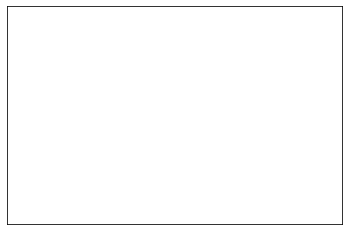

In [66]:
edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G , pos=graphviz_layout(G), edge_labels=edge_labels)

{'application_web_approved': Text(144.24, 52.869, 'application_web_approved'),
 'browse_products': Text(237.57, 66.201, 'browse_products'),
 'campaignemail_clicked': Text(182.77, 18.0, 'campaignemail_clicked'),
 'promotion_created': Text(171.92, 118.2, 'promotion_created'),
 'catalog_(mail)': Text(218.89, 82.387, 'catalog_(mail)'),
 'begin_checkout': Text(170.49, 77.864, 'begin_checkout'),
 'add_to_cart': Text(155.24, 33.609, 'add_to_cart'),
 'view_cart': Text(244.14, 50.19, 'view_cart'),
 'application_web_view': Text(171.56, 31.259, 'application_web_view'),
 'application_web_submit': Text(218.49, 25.645, 'application_web_submit'),
 'campaign_click': Text(193.07, 40.363, 'campaign_click'),
 'account_activitation': Text(142.85, 72.39, 'account_activitation'),
 'place_order_web': Text(248.26, 78.622, 'place_order_web'),
 'place_downpayment': Text(239.82, 96.694, 'place_downpayment'),
 'account_downpaymentcleared': Text(207.06, 121.13, 'account_downpaymentcleared'),
 'application_phone_ap

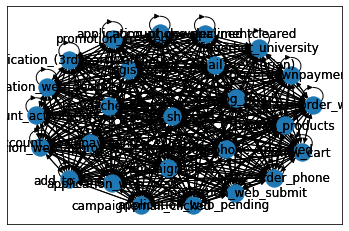

In [67]:
nx.draw_networkx(G, pos=graphviz_layout(G))
nx.draw_networkx_labels(G, pos=graphviz_layout(G))

In [68]:
smaller_sample.info()
len(smaller_sample)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3081634 entries, 3025070 to 170442
Data columns (total 11 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   customer_id              float64
 1   account_id               int64  
 2   stage                    object 
 3   ed_id                    int64  
 4   event_name               object 
 5   event_timestamp          object 
 6   journey_steps_until_end  int64  
 7   journey_id               float64
 8   milestone_number         float64
 9   next_ed                  float64
 10  next_event               object 
dtypes: float64(4), int64(3), object(4)
memory usage: 282.1+ MB


3081634

In [69]:
adj_matrix = nx.to_numpy_matrix(G, weight='weight')
nodes = list(G.nodes())
please = pd.DataFrame(adj_matrix, index=nodes, columns=nodes)

In [70]:
please = please.div(please.sum(axis=0), axis=1)
please.head()

,application_web_approved,browse_products,campaignemail_clicked,promotion_created,catalog_(mail),begin_checkout,add_to_cart,view_cart,application_web_view,application_web_submit,...,place_order_phone,pre-application_(3rd_party_affiliates),application_web_declined,site_registration,order_shipped,account_downpaymentreceived,catalog_(email)_(experian),fingerhut_university,application_phone_declined,application_web_pending
application_web_approved,0.000000,0.117986,0.041710,0.057185,0.012316,0.036352,0.011028,0.009928,0.076840,0.092796,...,0.004484,0.017379,0.001073,0.146961,0.000000,0.000465,0.038462,0.0,0.0,0.000000
browse_products,0.000292,0.000000,0.020654,0.009949,0.007597,0.005936,0.522426,0.022432,0.004079,0.004527,...,0.000733,0.000755,0.002600,0.015860,0.000813,0.002095,0.038462,0.0,0.0,0.000000
campaignemail_clicked,0.000841,0.045529,0.000000,0.064109,0.101865,0.018068,0.016525,0.025949,0.005980,0.006185,...,0.003793,0.000697,0.016091,0.013497,0.003614,0.026408,0.038462,0.0,0.0,0.487523
promotion_created,0.002530,0.029808,0.048733,0.000000,0.583274,0.018877,0.030044,0.023238,0.007494,0.008822,...,0.001841,0.002705,0.018742,0.029113,0.001122,0.003353,0.038462,0.0,1.0,0.000000
catalog_(mail),0.008786,0.025260,0.063470,0.192045,0.000000,0.006140,0.000842,0.011976,0.007734,0.001853,...,0.002805,0.004201,0.002475,0.027130,0.001868,0.001717,0.038462,0.0,0.0,0.000000


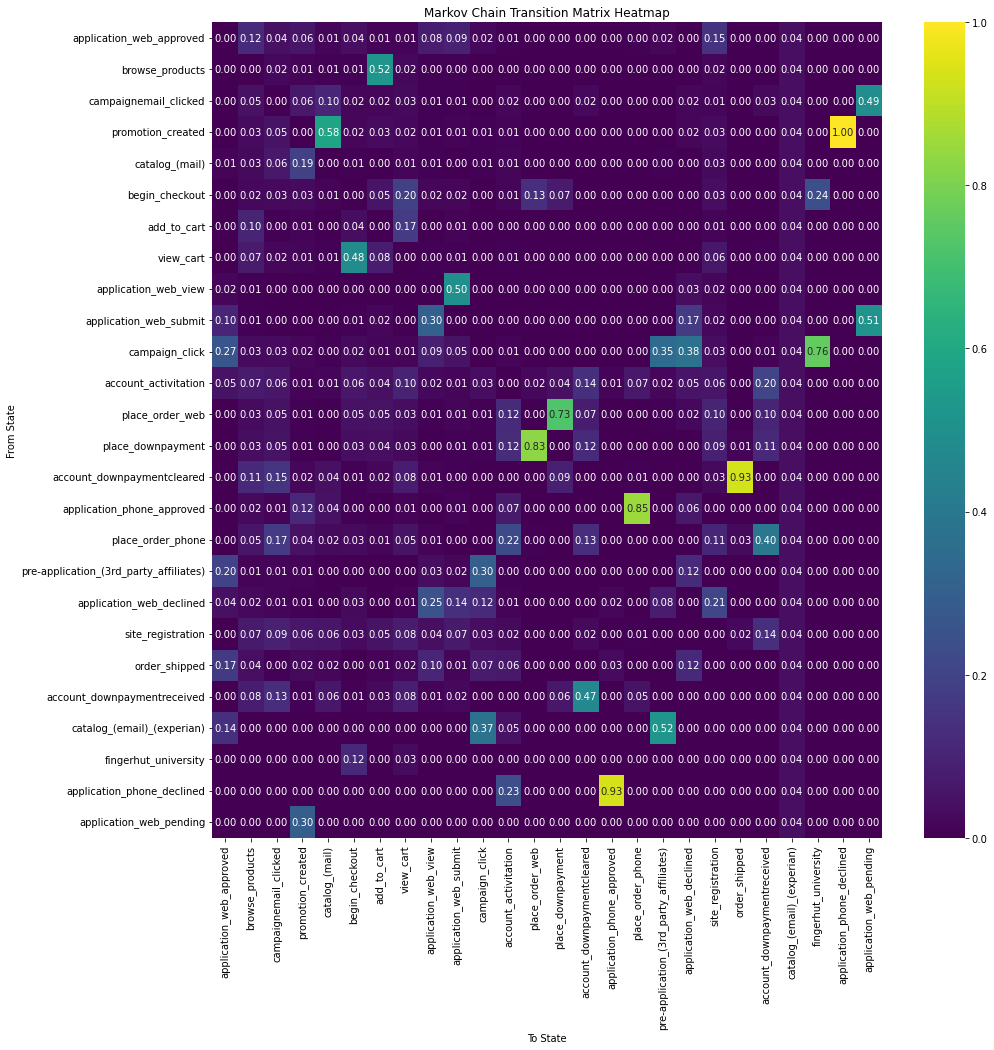

In [71]:
plt.figure(figsize=(15, 15))  # You might need to adjust the size depending on the number of states
sns.heatmap(please, annot=True, cmap='viridis', fmt=".2f")
plt.title('Markov Chain Transition Matrix Heatmap')
plt.xlabel('To State')
plt.ylabel('From State')
plt.show()

In [72]:
sampled_customer_ids = smaller_sample['customer_id'].drop_duplicates().sample(n=200, random_state=42)

In [73]:
smaller_sample4 = smaller_sample[smaller_sample['customer_id'].isin(sampled_customer_ids)]
smaller_sample4.sort_values(by=['customer_id', 'event_timestamp'], inplace=True)

/var/folders/xq/53p8ng8d1kl4qps60jfz4hdw0000gn/T/ipykernel_4237/3806587049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smaller_sample4.sort_values(by=['customer_id', 'event_timestamp'], inplace=True)


In [74]:
unique_events = smaller_sample4['event_name'].unique()
event_name_to_index = {event_name: i for i, event_name in enumerate(unique_events)}
n_events = len(unique_events)

In [75]:
transition_counts2 = np.zeros((n_events, n_events))

In [76]:
for _, group in smaller_sample4.groupby('customer_id'):
    events = group['event_name'].apply(lambda x: event_name_to_index[x]).values
    for i in range(len(events) - 1):
        current_event, next_event = events[i], events[i + 1]
        transition_counts2[current_event, next_event] += 1

In [77]:
transition_probs2 = transition_counts2 / transition_counts2.sum(axis=1, keepdims=True)
transition_probs2[np.isnan(transition_probs2)] = 0

In [78]:
np.fill_diagonal(transition_probs2, 0)

# Step 8: Create the transition probabilities DataFrame
transition_df2 = pd.DataFrame(transition_probs2, index=unique_events, columns=unique_events)

In [79]:
transition_df2

,campaign_click,application_web_approved,application_web_view,promotion_created,campaignemail_clicked,application_web_submit,catalog_(mail),browse_products,add_to_cart,account_activitation,...,view_cart,begin_checkout,place_order_web,account_downpaymentcleared,order_shipped,place_order_phone,account_downpaymentreceived,application_web_declined,pre-application_(3rd_party_affiliates),application_phone_approved
campaign_click,0.000000,0.433628,0.168142,0.035398,0.000000,0.017699,0.000000,0.150442,0.000000,0.035398,...,0.017699,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026549,0.106195,0.0
application_web_approved,0.042781,0.000000,0.128342,0.192513,0.026738,0.021390,0.005348,0.529412,0.005348,0.005348,...,0.026738,0.016043,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
application_web_view,0.001404,0.027388,0.000000,0.010534,0.002107,0.118680,0.000702,0.022472,0.002107,0.000000,...,0.004916,0.002107,0.000000,0.000000,0.000000,0.000702,0.000000,0.000000,0.000000,0.0
promotion_created,0.015172,0.004138,0.015172,0.000000,0.033103,0.001379,0.256552,0.128276,0.006897,0.009655,...,0.059310,0.011034,0.001379,0.001379,0.000000,0.002759,0.000000,0.000000,0.000000,0.0
campaignemail_clicked,0.006452,0.000000,0.025806,0.232258,0.000000,0.000000,0.038710,0.200000,0.006452,0.019355,...,0.083871,0.012903,0.000000,0.012903,0.000000,0.012903,0.006452,0.000000,0.000000,0.0
application_web_submit,0.009302,0.111628,0.679070,0.009302,0.000000,0.000000,0.000000,0.009302,0.004651,0.004651,...,0.009302,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
catalog_(mail),0.004525,0.004525,0.027149,0.633484,0.067873,0.000000,0.000000,0.126697,0.000000,0.000000,...,0.013575,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
browse_products,0.003806,0.000000,0.008997,0.033910,0.011073,0.000692,0.005190,0.000000,0.147405,0.002422,...,0.046021,0.005190,0.001038,0.001038,0.000000,0.000000,0.000346,0.000000,0.000346,0.0
add_to_cart,0.000000,0.000000,0.002008,0.040161,0.008032,0.000000,0.000000,0.393574,0.000000,0.004016,...,0.447791,0.018072,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
account_activitation,0.000000,0.116279,0.000000,0.046512,0.069767,0.023256,0.000000,0.395349,0.023256,0.000000,...,0.139535,0.023256,0.000000,0.046512,0.000000,0.000000,0.000000,0.000000,0.023256,0.0


In [80]:
import networkx as nx
G = nx.MultiDiGraph()
edges_wts2 = _get_markov_edges(transition_df2)

In [81]:
for k, v in edges_wts2.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)
print(f'Edges:')
print(G.edges(data=True))  

Edges:
[('campaign_click', 'campaign_click', {'weight': 0.0, 'label': 0.0}), ('campaign_click', 'application_web_approved', {'weight': 0.4336283185840708, 'label': 0.4336283185840708}), ('campaign_click', 'application_web_view', {'weight': 0.168141592920354, 'label': 0.168141592920354}), ('campaign_click', 'promotion_created', {'weight': 0.035398230088495575, 'label': 0.035398230088495575}), ('campaign_click', 'campaignemail_clicked', {'weight': 0.0, 'label': 0.0}), ('campaign_click', 'application_web_submit', {'weight': 0.017699115044247787, 'label': 0.017699115044247787}), ('campaign_click', 'catalog_(mail)', {'weight': 0.0, 'label': 0.0}), ('campaign_click', 'browse_products', {'weight': 0.1504424778761062, 'label': 0.1504424778761062}), ('campaign_click', 'add_to_cart', {'weight': 0.0, 'label': 0.0}), ('campaign_click', 'account_activitation', {'weight': 0.035398230088495575, 'label': 0.035398230088495575}), ('campaign_click', 'place_downpayment', {'weight': 0.0, 'label': 0.0}), ('

{('campaign_click', 'campaign_click'): Text(138.73, 53.243, '0.0'),
 ('campaign_click',
  'application_web_approved'): Text(181.92000000000002, 63.9055, '0.4336283185840708'),
 ('campaign_click',
  'application_web_view'): Text(156.99, 35.6215, '0.168141592920354'),
 ('campaign_click',
  'promotion_created'): Text(159.61, 88.6865, '0.035398230088495575'),
 ('campaign_click', 'campaignemail_clicked'): Text(173.155, 74.992, '0.0'),
 ('campaign_click',
  'application_web_submit'): Text(149.905, 66.3115, '0.017699115044247787'),
 ('campaign_click', 'catalog_(mail)'): Text(144.435, 42.4105, '0.0'),
 ('campaign_click',
  'browse_products'): Text(187.76999999999998, 53.644999999999996, '0.1504424778761062'),
 ('campaign_click', 'add_to_cart'): Text(151.07999999999998, 49.9315, '0.0'),
 ('campaign_click',
  'account_activitation'): Text(171.925, 37.3435, '0.035398230088495575'),
 ('campaign_click',
  'place_downpayment'): Text(162.53, 43.338499999999996, '0.0'),
 ('campaign_click',
  'view_car

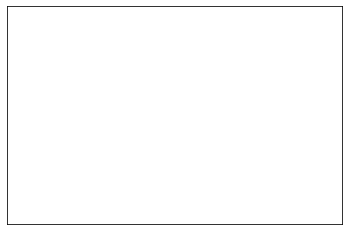

In [82]:
edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G , pos=graphviz_layout(G), edge_labels=edge_labels)

{'campaign_click': Text(138.73, 53.243, 'campaign_click'),
 'application_web_approved': Text(225.11, 74.568, 'application_web_approved'),
 'application_web_view': Text(175.25, 18.0, 'application_web_view'),
 'promotion_created': Text(180.49, 124.13, 'promotion_created'),
 'campaignemail_clicked': Text(207.58, 96.741, 'campaignemail_clicked'),
 'application_web_submit': Text(161.08, 79.38, 'application_web_submit'),
 'catalog_(mail)': Text(150.14, 31.578, 'catalog_(mail)'),
 'browse_products': Text(236.81, 54.047, 'browse_products'),
 'add_to_cart': Text(163.43, 46.62, 'add_to_cart'),
 'account_activitation': Text(205.12, 21.444, 'account_activitation'),
 'place_downpayment': Text(186.33, 33.434, 'place_downpayment'),
 'view_cart': Text(135.2, 73.38, 'view_cart'),
 'begin_checkout': Text(239.66, 84.377, 'begin_checkout'),
 'place_order_web': Text(225.26, 108.22, 'place_order_web'),
 'account_downpaymentcleared': Text(203.03, 120.28, 'account_downpaymentcleared'),
 'order_shipped': Text(

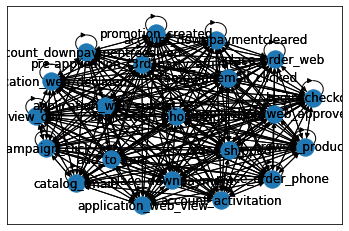

In [83]:
nx.draw_networkx(G, pos=graphviz_layout(G))
nx.draw_networkx_labels(G, pos=graphviz_layout(G))

In [1]:
import pandas as pd
pickle = pd.read_pickle('fingerhut_combined_grouped.pkl')

In [2]:
import mchmm as mc

In [3]:
sequence1 = pickle['stage'].iloc[0]

In [4]:
a = mc.MarkovChain().from_data(sequence1)

/Users/ronannayak/anaconda3/lib/python3.9/site-packages/mchmm/_mc.py:151: RuntimeWarning: invalid value encountered in true_divide
  self.observed_matrix / self._obs_row_totals[:, None]


In [5]:
a.observed_p_matrix

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.33333333, 0.66666667,
        0.        , 0.        ],
       [0.        , 0.05      , 0.        , 0.05      , 0.75      ,
        0.05      , 0.1       ],
       [0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
        0.14285714, 0.14285714],
       [0.        , 0.        , 0.        , 0.        , 0.75      ,
        0.        , 0.25      ]])

In [6]:
graph = a.graph_make(
      format="png",
      graph_attr=[("rankdir", "LR")],
      node_attr=[("fontname", "Roboto bold"), ("fontsize", "20")],
      edge_attr=[("fontname", "Iosevka"), ("fontsize", "12")]
    )
graph.render()

'Digraph.gv.png'

In [8]:
import random
random.seed(393)
small_pickle = pickle.sample(n=50, random_state = 393)

In [9]:
sequence1_small = small_pickle['stage'].iloc[0]
a1 = mc.MarkovChain().from_data(sequence1_small)
a1.observed_p_matrix

array([[0.9375    , 0.        , 0.        , 0.        , 0.0625    ,
        0.        ],
       [0.        , 0.25      , 0.        , 0.        , 0.75      ,
        0.        ],
       [0.5       , 0.        , 0.        , 0.        , 0.5       ,
        0.        ],
       [0.5       , 0.        , 0.        , 0.5       , 0.        ,
        0.        ],
       [0.        , 0.11111111, 0.11111111, 0.11111111, 0.22222222,
        0.44444444],
       [0.        , 0.5       , 0.        , 0.        , 0.5       ,
        0.        ]])

In [34]:
import mchmm as mc
markov_chain_plural = []

# Loop over each row in the DataFrame
for index, row in small_pickle.iterrows():
    # Extract the 'stage' sequence for the current row
    sequence = row['stage']
    
    # Create a Markov Chain from the sequence
    mc_obj = mc.MarkovChain().from_data(sequence)
    
    # Optionally, you can access and do something with the observed probability matrix here
    # For example, print it: print(mc_obj.observed_p_matrix)
    
    # Store the Markov Chain object in the list
    markov_chain_plural.append(mc_obj)

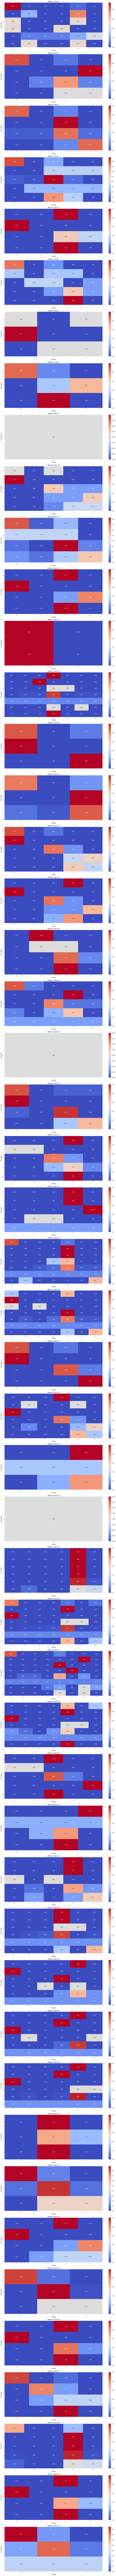

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a list of Markov Chain objects named markov_chains
# and each object has an .observed_p_matrix attribute

def plot_markov_chain_heatmap(mc, title, ax=None):
    """
    Plot a heatmap for the Markov Chain's observed probability matrix.
    
    Parameters:
    - mc: Markov Chain object with an observed_p_matrix attribute.
    - title: Title for the plot.
    - ax: Matplotlib Axes object to plot on.
    """
    if ax is None:
        ax = plt.gca()
    sns.heatmap(mc.observed_p_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
    ax.set_title(title)
    ax.set_xlabel('To State')
    ax.set_ylabel('From State')

# Create a figure to hold the subplots
fig, axes = plt.subplots(len(markov_chain_plural), 1, figsize=(15, len(markov_chain_plural) * 6))

# If there's only one Markov Chain, axes might not be an array
if len(markov_chain_plural) == 1:
    axes = [axes]

# Plot a heatmap for each Markov Chain's observed probability matrix
for i, mc in enumerate(markov_chain_plural):
    plot_title = f"Markov Chain {i + 1}"
    plot_markov_chain_heatmap(mc, plot_title, axes[i])

plt.tight_layout()
plt.show()


In [40]:
import numpy as np
unique_states = set()
for mc in markov_chain_plural:
    unique_states.update(mc.states)
unique_states = sorted(list(unique_states))  # Sort for consistent ordering

In [41]:
# Initialize an aggregated transition count matrix
n = len(unique_states)
aggregated_counts = np.zeros((n, n))

# Map each state to its index in the aggregated matrix
state_to_index = {state: i for i, state in enumerate(unique_states)}

for mc in markov_chain_plural:
    # Increment counts in the aggregated matrix based on observed transitions in mc
    for i in range(len(mc.states)-1):
        from_state, to_state = mc.states[i], mc.states[i+1]
        from_index, to_index = state_to_index[from_state], state_to_index[to_state]
        aggregated_counts[from_index, to_index] += 1  # Increment count for observed transition

# Optional: Convert counts to probabilities by normalizing each row
aggregated_probs = aggregated_counts / aggregated_counts.sum(axis=1, keepdims=True)
aggregated_probs = np.nan_to_num(aggregated_probs)  # Handle division by zero for states with no outgoing transitions


/var/folders/xq/53p8ng8d1kl4qps60jfz4hdw0000gn/T/ipykernel_4408/2394487653.py:16: RuntimeWarning: invalid value encountered in true_divide
  aggregated_probs = aggregated_counts / aggregated_counts.sum(axis=1, keepdims=True)


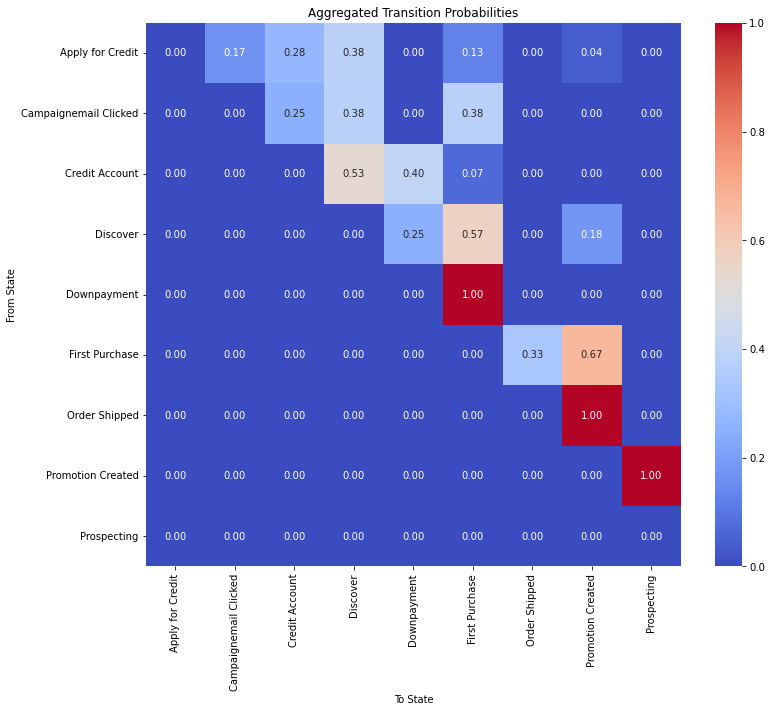

In [42]:
plt.figure(figsize=(12, 10))
sns.heatmap(aggregated_probs, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=unique_states, yticklabels=unique_states)
plt.title("Aggregated Transition Probabilities")
plt.xlabel("To State")
plt.ylabel("From State")
plt.show()

In [15]:
print(dir(markov_chain_plural[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_obs_row_totals', '_transition_matrix', 'chisquare', 'expected_matrix', 'from_data', 'graph_make', 'n_order_matrix', 'observed_matrix', 'observed_p_matrix', 'prob_to_freq_matrix', 'seq', 'simulate', 'states']


In [17]:
markov_chain_plural[5].states

array(['Apply for Credit', 'Campaignemail Clicked', 'First Purchase',
       'Promotion Created', 'Prospecting'], dtype='<U21')

In [91]:
small_pickle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 212225 to 885810
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   combined_id        50 non-null     int64 
 1   ed_id              50 non-null     object
 2   stage              50 non-null     object
 3   application        50 non-null     int64 
 4   activation         50 non-null     int64 
 5   place_order_web    50 non-null     int64 
 6   place_order_phone  50 non-null     int64 
 7   order_shipped      50 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 3.5+ KB


In [20]:
import mchmm as mc
markov_chains = {}

# Iterate over each row in the DataFrame
for index, row in small_pickle.iterrows():
    # Extract the combined_id and the sequence of stages for the current row
    combined_id = row['combined_id']
    sequence = row['stage']  # This is already a list based on your description
    
    # Create a Markov Chain from the sequence
    big = mc.MarkovChain().from_data(sequence)
    
    # Store the Markov Chain in the dictionary with the combined_id as the key
    markov_chains[combined_id] = big

/Users/ronannayak/anaconda3/lib/python3.9/site-packages/mchmm/_mc.py:151: RuntimeWarning: invalid value encountered in true_divide
  self.observed_matrix / self._obs_row_totals[:, None]
/Users/ronannayak/anaconda3/lib/python3.9/site-packages/scipy/stats/contingency.py:128: RuntimeWarning: invalid value encountered in true_divide
  expected = reduce(np.multiply, margsums) / observed.sum() ** (d - 1)


In [112]:
graph2 = markov_chains.graph_make(
      format="png",
      graph_attr=[("rankdir", "LR")],
      node_attr=[("fontname", "Roboto bold"), ("fontsize", "20")],
      edge_attr=[("fontname", "Iosevka"), ("fontsize", "12")]
    )
graph2.render()

AttributeError: 'dict' object has no attribute 'graph_make'

In [113]:
markov_chains

{<mchmm._mc.MarkovChain at 0x7f9cb8938610>: <mchmm._mc.MarkovChain at 0x7f9ca9360b80>,
 212225: <mchmm._mc.MarkovChain at 0x7f9cb892da00>,
 1657567: <mchmm._mc.MarkovChain at 0x7f9cb892de80>,
 1616359: <mchmm._mc.MarkovChain at 0x7f9cd4a947c0>,
 1611643: <mchmm._mc.MarkovChain at 0x7f9ce1166250>,
 975952: <mchmm._mc.MarkovChain at 0x7f9ce1a9c4c0>,
 1100584: <mchmm._mc.MarkovChain at 0x7f9ce1c83310>,
 555648: <mchmm._mc.MarkovChain at 0x7f9ce155aa60>,
 576525: <mchmm._mc.MarkovChain at 0x7f9ce15651c0>,
 1410330: <mchmm._mc.MarkovChain at 0x7f9ce156e1f0>,
 631062: <mchmm._mc.MarkovChain at 0x7f9ce157a370>,
 1629090: <mchmm._mc.MarkovChain at 0x7f9cd4a81bb0>,
 1596853: <mchmm._mc.MarkovChain at 0x7f9ce157a0a0>,
 828698: <mchmm._mc.MarkovChain at 0x7f9cb892dac0>,
 211313: <mchmm._mc.MarkovChain at 0x7f9ce157a3a0>,
 445434: <mchmm._mc.MarkovChain at 0x7f9cb892d6d0>,
 625670: <mchmm._mc.MarkovChain at 0x7f9cb892d310>,
 17831: <mchmm._mc.MarkovChain at 0x7f9cb892df70>,
 30447: <mchmm._mc.Mark

In [21]:
from graphviz import Digraph

In [28]:
def visualize_mchmm_markov_chain(mc, title):
    dot = Digraph(comment=title)
    
    # Extract states and transition matrix from the Markov Chain object
    for i in markov_chain_plural:
        states = markov_chain_plural[i].states
        transition_matrix = markov_chain_plural.observed_matrix
    
    # Add states to the graph
    for state in states:
        dot.node(state, state)
    
    # Add edges for transitions with their probabilities
    for i, from_state in enumerate(states):
        for j, to_state in enumerate(states):
            prob = transition_matrix[i][j]
            if prob > 0:  # You might want to filter by a probability threshold
                dot.edge(from_state, to_state, label=f"{prob:.2f}")
    
    # Render and view the graph (saves as PDF by default, you can change format)
    dot.render(title, format='png', view=True)

In [31]:
for combined_id, mc in markov_chain_plural[i].states():
    visualize_mchmm_markov_chain(mc, f"Markov Chain for {combined_id}")

TypeError: 'numpy.ndarray' object is not callable

In [106]:
markov_chains[combined_id]